<h1>Support Vector machines with simplified details</h1>

Abdullah Mohammadi, Ferdowsi University of Mashad

abdhmohammady@gmail.com

<h2>(1). Introduction</h2>

In this article, we are going to introduce the Support Vector Machine (SVM) algorithm, one of the Machine Learning (ML) algorithms. This algorithm is classified as a pattern recognition algorithm. More than 60 years ago, R.A. Fisher (Fisher, 1936) proposed the first algorithm for pattern recognition and showed that the optimal (Bayesian) solution is a quadratic decision function. The original SVM algorithm was developed in 1964 by Vladimir Vepnik and Alexei Cherninikis at the Institute of Control Sciences of the Russian Academy of Sciences. In 1992, Bowser, Isabelle Guyon, and Vepnik presented a way for nonlinear classification by introducing the kernel and adding it to SVM[1], and in 1995, Corinna Cortes and Vepnik introduced soft-margin SVM.[2] SVM applications in the real world can be used to distinguish faces from non-faces, classify text documents into different categories based on the points generated from the categories, recognize handwritten letters and confirm the validity of signatures in documents, analyze geographic environmental data, etc. SVM algorithms can not only make a reliable prediction but also reduce redundant information.[3]

In mathematics, we can find two parallel lines  $L_1:ax + by + c = 1$ and $L_2:ax + by + c = -1$ with a distance of $d=\frac{2}{\sqrt{a^2+b^2}}$ 
And between these two lines, the equation of the line which is exactly in the middle of them is determined by $ax+by+c=0$.

This concept is the basis of generating SVM algorithm. In this algorithm, it is assumed that such lines exist without being clearly stated. These lines in larger spaces are called hyperplanes. These hyperplanes are the margin hyperplanes in SVM, and the parallel hyperplane in the middle of these two is the separating hyperplane of the SVM algorithm. When searching this hyperplane, the sample data points (here x and y) are known, and the unknowns of the problem are a, b, and c, and the attempt is to maximize the distance defined by $d=\frac{2}{\sqrt{a^2+b^2}}$.

Here we explain very simply the steps of making this algorithm with a very simple example. And we calculate its mathematical operations manually so that you can fully understand it.

<h2>(2). Linear programming problem for SVM</h2>

As we said, in svm, we try to maximize the distance between two hyperplanes. Suppose have a dataset with $m$ features and $n$ datapoints $X_i \ for\ i:1,...,n$, the formula of the hyperplanes is expressed by:

$(1)\ \ w^TX_i+w_0=1$

$(2)\ \ w^TX_i+w0=-1$
 
 the $w=[w_1,w_2,...,w_m]$ is the vector of weights, in tow dimentional space mentioned above $w$ is $[a,b]$, 
 
 as we say in the $Introduction$ we must maximize the distance of to hyperplanes with given formulas (1) and (2), therfore have to maximize $\frac{2}{||w||^2}$ or minimize $\frac{||w||^2}{2}= \frac{1}{2}w^T.w$.

In this problem we have some constraints, the samples of class +1 must be biger than or equal to 1 from formula (1), and samples of class -1 less than or equal to -1 from formula (2). thus:

$(3) \ \ Min\ \ \frac{||w||^2}{2}$

$\ \ \ \ \ \ \ subject\ to:$

$\ \ \ \ \ \ \ w^TX_i+w_0\ge 1\ for \ X_i \in Class\ \ 1$

$\ \ \ \ \ \ \ w^TX_i+w_0\le -1\ for \ X_i \in Class -1$

because of simplifying the formulation we define $r_i= 1 $ for $X_i$ in class 1 and $r_i=-1$ for $X_i$ in class -1 and rewrite formulation as:

$(4) \ \ Min\ \ \frac{||w||^2}{2}$

$\ \ \ \ \ \ \ subject\ to: \ r_i(w^TX_i+w_0)\ge 1\ for \ all\ X_i$

this is standard formulation of the SVM.

<h2>(3). Solving aproach</h2>

The intuitive aproach for solving SVM problem is dual of problem (4).

First,It is converted to Lagrangane function using Lagrange multipliers $\alpha_i$

$(5)\ \ \ \ \ \ \ \ \  L=\frac{1}{2}w^T.w-\sum_{i=1}^{n}\alpha_i(r_i(w^TX_i+w_0)-1)$

$(6)\Longrightarrow L=\frac{1}{2}w^T.w-\sum_{i=1}^{n}\alpha_ir_i(w^TX_i+w_0)+\sum_{i=1}^{n}\alpha_i$

and the gradient of $L$ with respect to $w$ and $w_0$ we get:

$(7)\ w=\sum_{i=1}^{n}\alpha_ir_iX_i$

$(8)\ \sum_{i=1}^{n}{\alpha_ir_i}=0$

Plugging these into equation $(6)$, we get the dual :

$(9)\ \ Max\ \ \ \ L=\sum_{i=1}^n\alpha_i-\frac{1}{2}\sum_{i=1}^{n}\sum_{j=1}^{n}\alpha_i\alpha_jr_ir_jX_i^TX_j$

$subject\ to:\ \sum_{i=1}^{n}\alpha_ir_i=0 \ and\ \alpha_i\ge 0$

Finally we calculate $w_0$ from any  $\ support\ vector$:

$(10):\ \ w_0 = r_i -w^TX_i$

<h2>(4). A practice(Manual solving practice)</h2>

Suppose our dataset is $X_1=\left[\begin{matrix}1\\2\\\end{matrix}\right]$ and $X_2=\left[\begin{matrix}3\\1\\\end{matrix}\right]$ and $r_1=-1,\ r_2=+1$ this means $X_1\in Class\ -1$ and $X_2\in Class\ +1$

the scatter plot of this dataset is shown below:

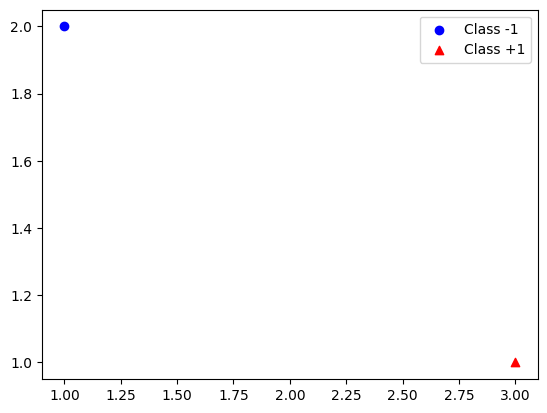

In [1]:
import matplotlib.pyplot as plt

X1 = [1,2] # sample 1
X2 = [3,1] # sample 2
r  = [-1,+1] # class of samples

plt.scatter([1], [2], c ="blue",label='Class -1')           # class -1
plt.scatter([3], [1],marker='^', c ="red",label='Class +1') # class +1

# To show the plot
plt.legend()
plt.show()


we going to classify this simple dataset, from eqauation $(9)$ we have:

$Max\ \alpha_1 + \alpha_2-\frac{1}{2}(\alpha_1\alpha_1r_1r_1X_1^TX_1+\alpha_1\alpha_2r_1r_2X_1^TX_2+\alpha_2\alpha_1r_2r_1X_2^TX_1+\alpha_2\alpha_2r_2r_2X_2^TX_2)\ \ (11)$

$subject \ to: \alpha_1r_1+\alpha_2r_2=0\Longrightarrow -\alpha_1+\alpha_2=0\Longrightarrow \alpha_1=\alpha_2\ \ \ \ (12)$

$(11)\Longrightarrow\ \ Max\ \ 2\alpha_1-\frac{1}{2}(\alpha_1^2X_1^T.X_1-\alpha_1^2X_1^T.X_2-\alpha_1^2X_2^T.X_1+\alpha_1^2X_2^T.X_2)$


$\Longrightarrow\ \ Max\ \ 2\alpha_1-\frac{1}{2}(\alpha_1^2[1\ \ 2].\left[\begin{matrix}1\\2\\\end{matrix}\right]-\alpha_1^2[1\ \ 2].\left[\begin{matrix}3\\1\\\end{matrix}\right]-\alpha_1^2[3\ \ 1].\left[\begin{matrix}1\\2\\\end{matrix}\right]+\alpha_1^2[3\ \ 1].\left[\begin{matrix}3\\1\\\end{matrix}\right])=2\alpha_1-\frac{5}{2}\alpha_1^2$

Now, We know that $L(\alpha_1)=2\alpha_1-\frac{5}{2}\alpha_1^2$ is a quadratic function, the gradiant of $L$ respect to $\alpha_1$ must be $0$ to maximize it.

$\Longrightarrow \frac{\partial L}{\partial\alpha_1}=2-5\alpha_1=0 \Longrightarrow \alpha_1=\frac{2}{5}\ \ and\ from\ (12)\ \alpha_2=\frac{2}{5}$


<h2>(5). Finding weights</h2>

$\alpha_1$ and $\alpha_2$ was found, now we use equation $(7)$ to find $w$:

using $(7)$ we have: $w=\alpha_1r_1X_1+\alpha_2r_2X_2=\frac{2}{5}(-1)\left[\begin{matrix}1\\2\\\end{matrix}\right]+\frac{2}{5}(+1)\left[\begin{matrix}3\\1\\\end{matrix}\right]=\left[\begin{matrix}+\frac{4}{5}\\\\-\frac{2}{5}\\\end{matrix}\right]$

$\Longrightarrow w=\left[\begin{matrix}+\frac{4}{5}\\\\-\frac{2}{5}\\\end{matrix}\right]$ using equation $(10)$ is found $w_0=-1-[\frac{4}{5}\ -\frac{2}{5}].\left[\begin{matrix}1\\2\\\end{matrix}\right]=-1 \Longrightarrow w_0=-1$

<h2>(6). Hyperplanes</h2>

Respect to above we constract the SVM hyperplanes by:

$[\frac{4}{5}\ -\frac{2}{5}]X-1=+1$

$[\frac{4}{5}\ -\frac{2}{5}]X-1=-1$

when we define $X=[x\ \ y]$ then the lines is shown by $\frac{4}{5}x-\frac{2}{5}y-1=-1$ and $\frac{4}{5}x-\frac{2}{5}y-1=+1$ and the line which it separates tow classes using 

$ax+by+c=0$ is given by: $\frac{4}{5}x-\frac{2}{5}y-1=0$

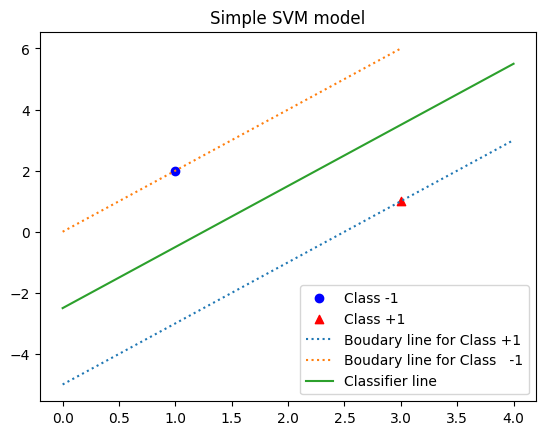

In [2]:
import matplotlib.pyplot as plt
import numpy as np
X1 = [1,2] # sample 1
X2 = [3,1] # sample 2
r  = [-1,+1] # class of samples

plt.title("Simple SVM model")

plt.scatter([1], [2], c ="blue",label='Class -1')           # class -1
plt.scatter([3], [1],marker='^', c ="red",label='Class +1') # class +1

# Calculated y-values from 4/5x-2/5y -1 = +1
ypoints1 = np.array([-5, -3,-1,1,3])

plt.plot(ypoints1, linestyle = 'dotted',label='Boudary line for Class +1')

# Calculated y-values from 4/5x-2/5y -1 = -1
ypoints_1 = np.array([0, 2,4,6])

plt.plot(ypoints_1, linestyle = 'dotted',label='Boudary line for Class   -1')

# Calculated y-values from 4/5x-2/5y -1 = 0
ypoints = np.array([-2.5, -0.5,1.5,3.5,5.5])

plt.plot(ypoints,label='Classifier line')

plt.legend()
plt.show()

The SVM problem of equation (9) can be solved using quadratic programming methods, What needs to be understood here is how we used the above equations! In fact, what we needed is to solve the optimization problem $(9)$ and in the next step use the relations to obtain the weights from $(7)$ and the bias from $(10)$

<h2>(7). How to classification new datapoints</h2>

To solve this problem, we should use the inequalities mentioned in constrains of $(3)$ to classify new data. if $w^TX+w_0$ is greater than +1 for given $X$, the $X$ is classified in $Class\ +1$ and if is less than -1, is set to $Class\ -1$. 

<h2>(8). Scikit-learn package for SVM</h2>

In this part, we want to compare the results using the Python library. Here we use the same data from the section (4).

To use the SVM model, we must import SVC from the klearn.svm library, and after calling SVC, the SVM classifier model is created, after that, it is enough to fit the model by calling the fit function. only this! The work is done!

In [8]:
from sklearn.svm import SVC

import pandas as pd

df = pd.DataFrame(columns=['Feature 1','Feature 2','Labels'],data=[[1,2,-1],[3,1,1]])
X= df[['Feature 1','Feature 2']].values

y = df[['Labels']].values

clf = SVC(kernel='linear',)
clf.fit(X,y)

C:\Users\Abdh\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

In this section, we compare the results by drawing a graph, look at the printed values! the SVM model produced exactly the same results as ours for the weights for $w$ and bias for $w_0$.

Support Vectors [1. 2.] , [3. 1.]
weights [ 0.8 -0.4]
w0: -1.0


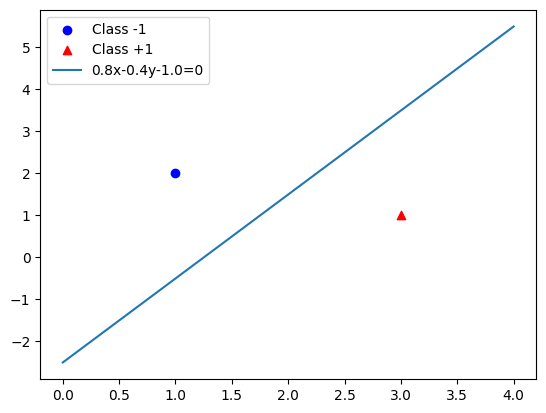

In [5]:
import numpy as np
#from seaborn import scatterplot

plt.scatter([1], [2], c ="blue",label='Class -1')           # class -1
plt.scatter([3], [1],marker='^', c ="red",label='Class +1') # class +1

print('Support Vectors',clf.support_vectors_[0],',',clf.support_vectors_[1])

print('weights',clf.coef_[0])
print('w0:',clf.intercept_[0])

w = clf.coef_[0]
w0 = clf.intercept_[0]


x_visual = np.linspace(0,4)
y_visual = -(w[0] / w[1]) * x_visual - w0 / w[1]

plt.plot(x_visual, y_visual,label=r'{}x{}y{}=0'.format(w[0],w[1], w0))
plt.legend()

plt.show()

<h2>(9). Large datasets</h2>
In another notebook, we have discussed the SVM algorithm in detail. You can refer to the link <a href='https://github.com/abdhmohammadi/Support-Vector-Machines/blob/main/SVM_Algorithm.ipynb'>SVM Algorithm</a> for more information and to see the performance of SVM in more detail.

<h2>(10). References</h2>
1 - B. E. Boser, I. M. Guyon, and V. N. Vapnik. A training algorithm for optimal margin classifiers. In D. Haussler, editor, 5th Annual ACM Workshop on COLT, pages 144–152, Pittsburgh, PA, 1992. ACM Press

2 - Cortes، Corinna; Vapnik, Vladimir (1995) - Support-vector networks

3 - https://shahaab-co.com/mag/edu/ml/applications-of-svm/
